In [1]:
import pandas as pd
import matplotlib.pyplot as plt

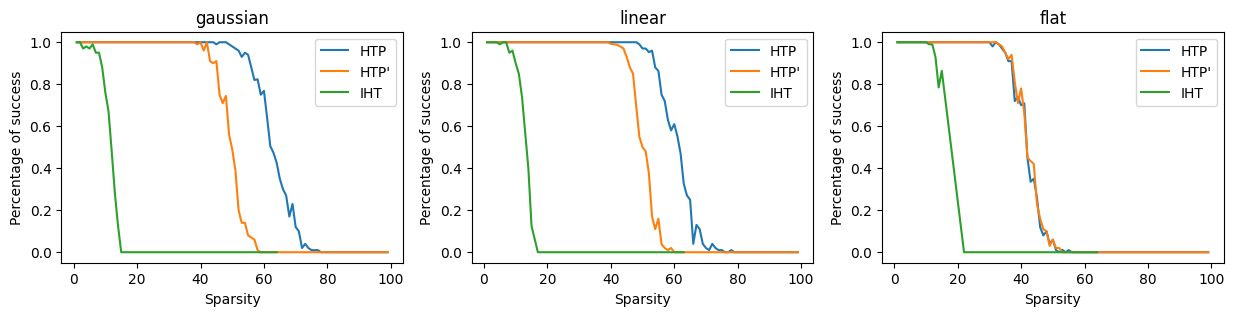

In [3]:
df = pd.read_csv('HTP.csv')
df_success_rate = df.groupby(["s", "method", "type"])["success"].mean().reset_index()

# Plot the success rate with 3*1 figures
fig, axes = plt.subplots(1, 3, figsize=(15, 3))
for i, type in enumerate(["gaussian", "linear", "flat"]):
    axes[i].set_xlabel("Sparsity")
    axes[i].set_ylabel("Percentage of success")
    axes[i].set_title(type)
    for method in df_success_rate["method"].unique():
        df_temp = df_success_rate[(df_success_rate["method"] == method) & (df_success_rate["type"] == type)]
        axes[i].plot(df_temp["s"], df_temp["success"], label=method)
    axes[i].legend()
plt.show()